In [140]:
# 1.1引入必要的库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')
df_train = pd.read_csv('train.csv',index_col=0)

In [141]:
# 1.2查看数据和表头
print(df_train.head())
len(list(df_train.columns))

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0    NaN   NaN   

   M

80

In [167]:
# 1.3描述性统计，会自动选取数值型数据进行描述统计分析
df_train.describe()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

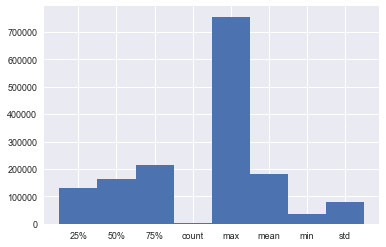

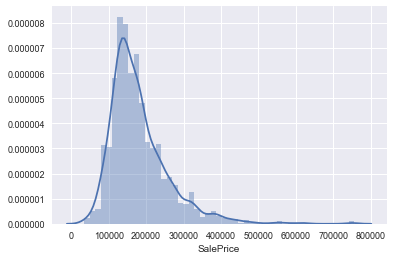

In [144]:
#1.4看一下列“SalePrice”，价格分布，结论：是个正偏态，
# print(df_train["SalePrice"].describe())
plt.bar(df_train["SalePrice"].describe().index,df_train["SalePrice"].describe(),width=1)
plt.show()

#不知道为什么加上plt.show(),两个图都会显示，
import seaborn as sns 
sns.distplot(df_train["SalePrice"])
plt.show()

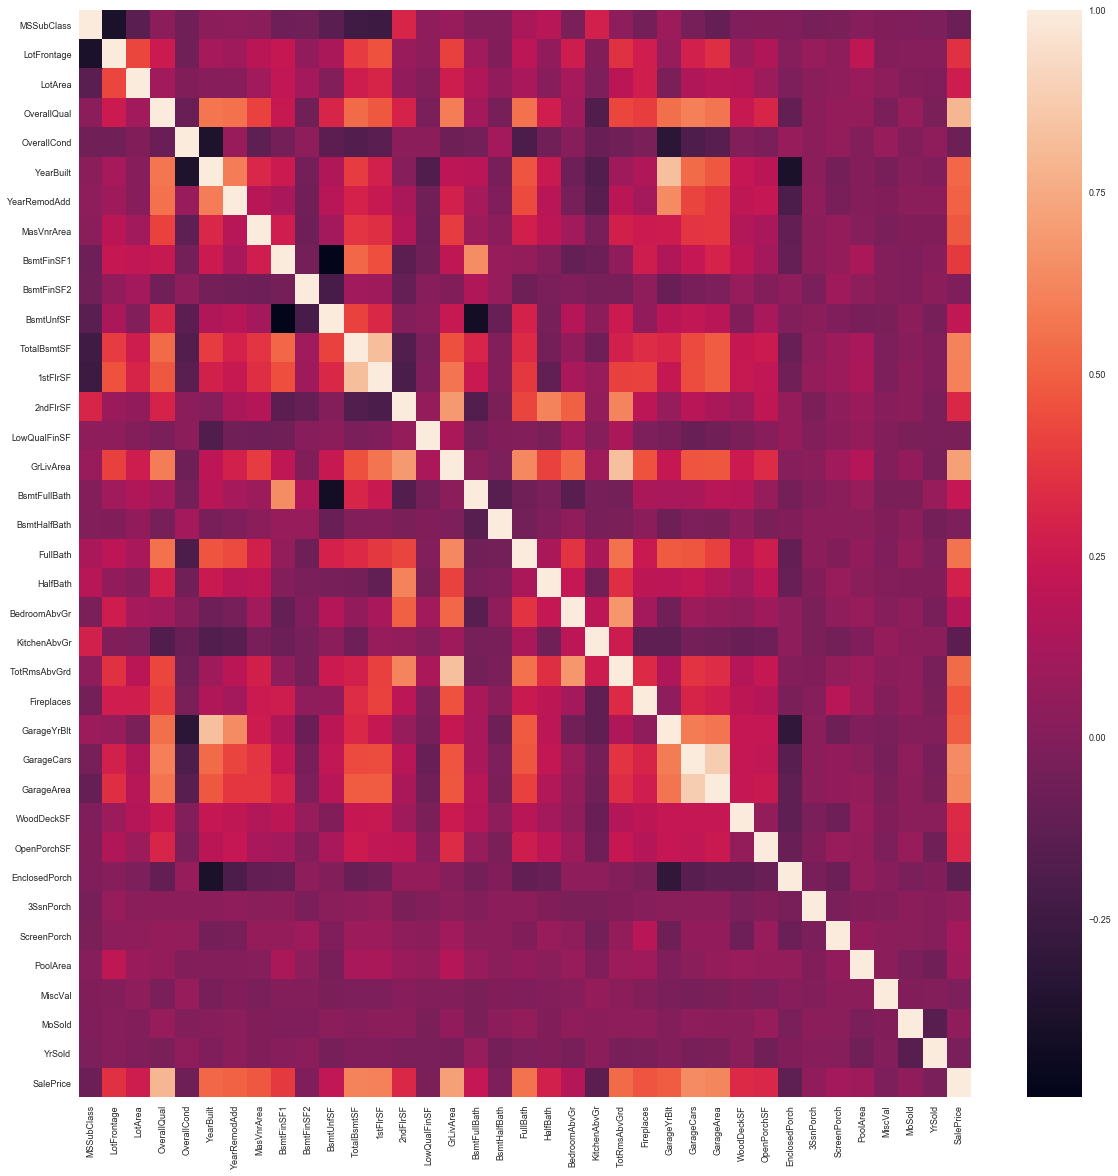

In [145]:
# 2.1 相关矩阵： 使用热力图函数heatmap展示相关系数，
# df.corr,获得全部相关矩阵
f = plt.subplots(figsize=(20,20))
sns.heatmap(df_train.corr())
plt.show()



Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt'],
      dtype='object')


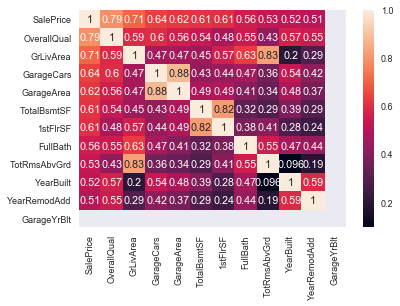

In [146]:
# 2.2 找出跟结果（SalePrice）相关高的变量，
k = 12
cols = df_train.corr().nlargest(k,"SalePrice").index
print(cols)

cols_matrix = np.corrcoef(df_train[cols].values.T)
# 字号大小，
sns.set(font_scale=0.9)
# annot= True,表示在矩阵中显示相关数据，
sns.heatmap(cols_matrix,annot=True,xticklabels=cols.values,yticklabels=cols.values)
plt.show()

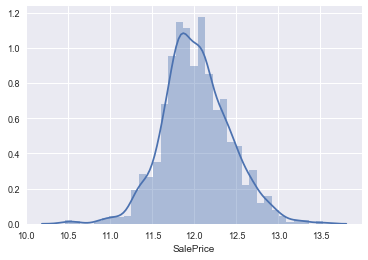

(1460, 79) (1459, 79)


In [173]:
#3.1 开始数据处理

# 1. 数据分布——正态化，平滑居中
train_df = pd.read_csv('train.csv',index_col=0)
test_df = pd.read_csv('test.csv',index_col=0)

y_train = np.log1p(train_df.pop('SalePrice'))
y_test = np.log1p(test_df.pop('SalePrice'))
sns.distplot(y_train)
plt.show()
print(train_df.shape,test_df.shape)

In [150]:
allWithoutSalePrice_df = pd.concat([train_df,test_df])
allWithoutSalePrice_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml


In [151]:
# 3.2类别变量处理：
# 将类别变量，进行哑变量处理，无论是数字型种类，还是其他文字或符号型种类

# 将test和train数据合并一起处理
allWithoutSalePrice_df = pd.concat([train_df,test_df])
allWithoutSalePrice_df.head(10)
all_dummy_df = pd.get_dummies(allWithoutSalePrice_df)
print(all_dummy_df.head())

    MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0     8450            7            5       2003   
2           20         80.0     9600            6            8       1976   
3           60         68.0    11250            7            5       2001   
4           70         60.0     9550            7            5       1915   
5           60         84.0    14260            8            5       2000   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
Id                                                            ...             
1           2003       196.0       706.0         0.0          ...             
2           1976         0.0       978.0         0.0          ...             
3           2002       162.0       486.0         0.0          ...             
4           1970         0.0       216.0         0.0          ...

In [155]:
# 3.3缺失值处理：
# 这里暂时采用平均值填充
mean_cols = all_dummy_df.mean()
all_dummy_df = all_dummy_df.fillna(mean_cols)
all_dummy_df.isnull().sum().sum()


0

In [199]:
# 3.4标准化处理：只针对数值型数据，
# 与平均值的差除以吧标准差
z_cols = all_dummy_df.columns[all_dummy_df.dtypes!="object"]
print(z_cols)
mean_cols_num = all_dummy_df.loc[:,z_cols].mean()
std_cols_num = all_dummy_df.loc[:,z_cols].std()
all_dummy_df.loc[:,z_cols] = (all_dummy_df.loc[:,z_cols]-mean_cols_num)/std_cols_num
all_dummy_df.head()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=288)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.067320,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.29308,...,-0.052414,-0.298578,-0.049021,0.394951,-0.263816,-0.064238,-0.091035,-0.126513,0.463857,-0.302641
2,-0.873466,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.29308,...,-0.052414,-0.298578,-0.049021,0.394951,-0.263816,-0.064238,-0.091035,-0.126513,0.463857,-0.302641
3,0.067320,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.29308,...,-0.052414,-0.298578,-0.049021,0.394951,-0.263816,-0.064238,-0.091035,-0.126513,0.463857,-0.302641
4,0.302516,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,...,-0.052414,-0.298578,-0.049021,0.394951,3.789226,-0.064238,-0.091035,-0.126513,-2.155097,-0.302641
5,0.067320,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.29308,...,-0.052414,-0.298578,-0.049021,0.394951,-0.263816,-0.064238,-0.091035,-0.126513,0.463857,-0.302641


In [200]:
# 3.5 数据处理完毕，分割train和test两份
train_df_dum = all_dummy_df.loc[train_df.index]
test_df_dum = all_dummy_df.loc[test_df.index]

train_df_dum.shape,test_df_dum.shape

((1460, 288), (1459, 288))

[  1.00000000e-03   1.26485522e-03   1.59985872e-03   2.02358965e-03
   2.55954792e-03   3.23745754e-03   4.09491506e-03   5.17947468e-03
   6.55128557e-03   8.28642773e-03   1.04811313e-02   1.32571137e-02
   1.67683294e-02   2.12095089e-02   2.68269580e-02   3.39322177e-02
   4.29193426e-02   5.42867544e-02   6.86648845e-02   8.68511374e-02
   1.09854114e-01   1.38949549e-01   1.75751062e-01   2.22299648e-01
   2.81176870e-01   3.55648031e-01   4.49843267e-01   5.68986603e-01
   7.19685673e-01   9.10298178e-01   1.15139540e+00   1.45634848e+00
   1.84206997e+00   2.32995181e+00   2.94705170e+00   3.72759372e+00
   4.71486636e+00   5.96362332e+00   7.54312006e+00   9.54095476e+00
   1.20679264e+01   1.52641797e+01   1.93069773e+01   2.44205309e+01
   3.08884360e+01   3.90693994e+01   4.94171336e+01   6.25055193e+01
   7.90604321e+01   1.00000000e+02]


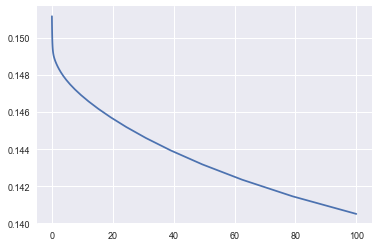

In [207]:
# 4.1 上模型拟合——岭回归
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
# 岭回归：添加惩罚项，来防止过拟合&降低复杂度
# alpha 是惩罚项的系数，越大表示惩罚越狠越重，倾向于简化模型
for alpha in alphas:
    model_Ridge = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(model_Ridge,X_train,y_train,cv=10,scoring = "neg_mean_squared_error"))
    test_scores.append(np.mean(test_score))
plt.plot(alphas,test_scores)

plt.show()

# 效果不太好，alpha=【10，20】

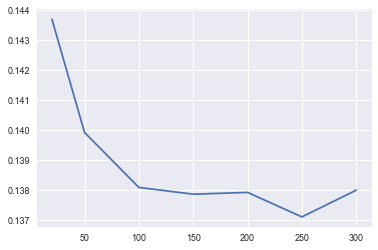

In [208]:
# 4.2 模型拟合——随机森林
from sklearn.ensemble import RandomForestRegressor
N_estimators = [20,50,100,150,200,250,300]
test_scores_1 =[]
for N in N_estimators:
    model_RF = RandomForestRegressor(n_estimators=N,max_features=0.3)
    test_score_1 = np.sqrt(-cross_val_score(model_RF,X_train,y_train,cv=5,scoring = "neg_mean_squared_error"))
    test_scores_1.append(np.mean(test_score_1))
plt.plot(N_estimators,test_scores_1)
plt.show()

# n_estimators=250为最佳

In [215]:
#  4.3 集成学习Ensemble
ridge =Ridge(alpha=15)
RF = RandomForestRegressor(n_estimators=250,max_features=0.3)
ridge.fit(X_train,y_train)
RF.fit(X_train,y_train)

ridge_predict = ridge.predict(X_test)
RF_predict = RF.predict(X_test)
test_score = ridge.score(X_train,y_train)
print(test_score)
y_ridge = np.expm1(ridge_predict)
y_RF = np.expm1(RF_predict)


0.943823507967
